In [1]:
# Imports
import os
import time

import numpy as np
import pandas as pd

import tensorflow as tf

import matplotlib.pyplot as plt

# Data Visualization
def plothistory(hist):
    pd.DataFrame(hist.history).plot(figsize=(8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0, 1)  # vertical range: [0, 1]
    plt.show()

In [2]:
# Read Data
raw_text_corpus = open("../data/lyrics_corpus.txt", "rb").read().decode(encoding="utf-8")

print(f"Length of text (in characters): {len(raw_text_corpus)}")
raw_text_corpus

Length of text (in characters): 23327


'All my friends are heathens, take it slow Wait for them to ask you who you know Please dont make any sudden moves You dont know the half of the abuse All my friends are heathens, take it slow Wait for them to ask you who you know Please dont make any sudden moves You dont know the half of the abuse Welcome to the room of people Who have rooms of people that they loved one day Docked away Just because we check the guns at the door Doesnt mean our brains will change from hand grenades You’ll never know the psychopath sitting next to you You’ll never know the murderer sitting next to you Youll think, Howd I get here, sitting next to you? But after all Ive said, please dont forget All my friends are heathens, take it slow Wait for them to ask you who you know Please dont make any sudden moves You dont know the half of the abuse We dont deal with outsiders very well They say newcomers have a certain smell You have trust issues, not to mention They say they can smell your intentions Youll n

In [3]:
# Remove all occurrences of those stupid '\r's
raw_text_corpus = raw_text_corpus.replace("\r", "")

Vocabulary: ListWrapper(['<UNK>', ' ', '!', ',', '-', '.', '1', '<', '>', '?', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'R', 'S', 'T', 'U', 'V', 'W', 'Y', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', '’'])
Input: Tensor("strided_slice:0", shape=(None,), dtype=int64)
Target: Tensor("strided_slice_1:0", shape=(None,), dtype=int64)
Corpus ID Tensor Shape: (11, None)
Corpus ID tf.Dataset: <MapDataset element_spec=(TensorSpec(shape=(None,), dtype=tf.int64, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>
Shuffled Dataset Object: <PrefetchDataset element_spec=(TensorSpec(shape=(11, None), dtype=tf.int64, name=None), TensorSpec(shape=(11, None), dtype=tf.int64, name=None))>
(array([[ 7, 27, 24, ...,  0,  0,  0],
       [ 7, 27, 24, ...,  0,  0,  0],
       [ 7, 27, 24, ...,  0,  0,  0],
       ...,
       [ 7, 27, 24, ...,  0,  0,  0],
       [ 7, 27, 2

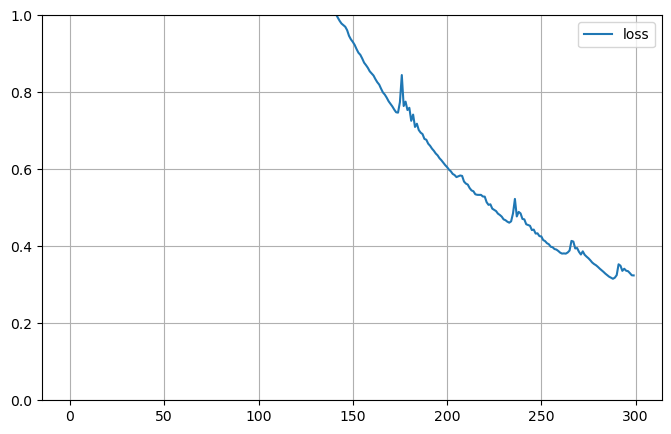

In [23]:
from tensorflow.keras.layers import GRU#, LSTM
from tensorflow.keras.optimizers import Adam
from namegeneration import NamePredictor, NameGenerator, Result

# Meat of the model is here
recurrent_cell = GRU(units=100, return_state=True, return_sequences=True)

# Create Generator
lyrics_generator = NameGenerator(recurrent_cell)

# Train Generator
history = lyrics_generator.train(raw_text_corpus, embedding_dim=100,
                                 optimizer=Adam(learning_rate=0.01), metrics=[], callbacks=[], 
                                 epochs=300, shuffle_data=True)

# Visualize the Data (even if it seems arbitrary)
plothistory(history)

In [46]:
# Generate lyrics
lyrics_generator.generate(1, stop_at_timestep=10_000).value

Converting to string representation...


array(['Thew fleryface and thyire when Im redical Im Can you save me, lot te for sh like I trulting I was stop it so run Stay wouth turrain braight in my lengure crabbe factle whipinf as waction sthen wife, you know its like And if right now, a difteder I keed bel exare and are head pie faiss with it, out Wait, home eave, tolcin it, I leach me, my blood, yaverics those time to the moment you And gry hids ofy my counded Theres all think And Ill be holding on to you me to scre crooss to slie for my bones Call Call, call, call know the base Im surroundings I lead If I dead in for under sitting next to you Youll that itter med is my lifirg I would need right I Preder is say would gunder swor my miend My opinion, How frain foll and onteng, there geppin my cen the wask a Ate the same Im slient chlorine Let the vibe, let the vibe Sworss too slow Ill miss youren order twask give ines all you Cause we for thes Wish we go a food a bast moment keep on my befo uts zare who knes to a crued that the